<a href="https://colab.research.google.com/github/Josephnyingi/Titanic-Survival-Prediction-Model/blob/main/Titanic_Survival_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

## Specifying the Research Question

This analysis aims to develop a prediction model to determine whether or not a passenger would survive on the titanic.

## Defining the Metric for Success

The project will be considered a success when developing a reliable prediction model with a high accuracy level. The model should also not suffer from any instances of overfitting or underfitting.

## Understanding the Context

The Titanic was a British passenger liner that sank in the North Atlantic ocean on April 15, 1912, after hitting an iceberg while on transit from Southampton to NYC. This shipwreck is considered one of the deadliest accidents in which more than 1,500 passengers died out of estimated 2,224 passengers and crew members aboard the ship. The incident has remained one of the most talked-about history points, with several movies and books being developed to narrate the story. 

This analysis aims to use available Titanic data to come up with a model that can predict whether a passenger survived or not. Some of the features that will be trained in this model include the gender and age and the cabin where they were located. The analysis uses a K-Nearest Neighbors Classifier to build the prediction model.


## Recording the Experimental Design

Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

•	Load data and preliminary preview characteristics

•	Data Cleaning

•	EDA

•	Implementing the Solution

•	Challenging the Solution

•	Follow Up Questions


## Data Relevance

The dataset was sourced online and contained relevant information that can allow us to respond to the research question satisfactorily. Some of the dataset attributes include passenger id, age, gender, name, and whether they survived. The total number of attributes is 12, while the number of records 891.

An additional 418 records were available but could not be used in the analysis since the target variable was missing for those records.



# Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from collections import Counter

# Reading the Data

In [ ]:
# Reading the data from the csv file

titanic = pd.read_csv('train (5).csv',index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Checking the Data

In [ ]:
# Checking the top 5 records

titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Checking the last 5 records

titanic.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Confirming number of records and columns

titanic.shape

(891, 11)

In [ ]:
# Checking the attributes data type

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
# Checking number of unique variables for each column

titanic.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [ ]:
# Checking all unique column values 

for i in titanic.columns:
  
  print(i)
  print(titanic[i].unique())

Survived
[0 1]
Pclass
[3 1 2]
Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'D

# Data Cleaning

In [ ]:
# Checking for duplicates

titanic.duplicated().any()

False

- No duplicate records in the dataset

In [ ]:
# Check for missing data

titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Dropping the Cabin attribute since it has only 204 records available

titanic = titanic.drop(columns=['Cabin'])

In [ ]:
# Drop remaining null values

titanic = titanic.dropna()

In [ ]:
# Checking the shape of the new dataset

titanic.shape

(712, 10)

- The name column seems irrelevant for this analysis so we can drop it now.


In [ ]:
# Dropping name column

titanic = titanic.drop(columns=['Name'])

titanic.sample(n=7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
701,1,1,female,18.0,1,0,PC 17757,227.525,C
874,0,3,male,47.0,0,0,345765,9.000,S
810,1,1,female,33.0,1,0,113806,53.100,S
59,1,2,female,5.0,1,2,C.A. 34651,27.750,S
835,0,3,male,18.0,0,0,2223,8.300,S
191,1,2,female,32.0,0,0,234604,13.000,S
42,0,2,female,27.0,1,0,11668,21.000,S


Outliers

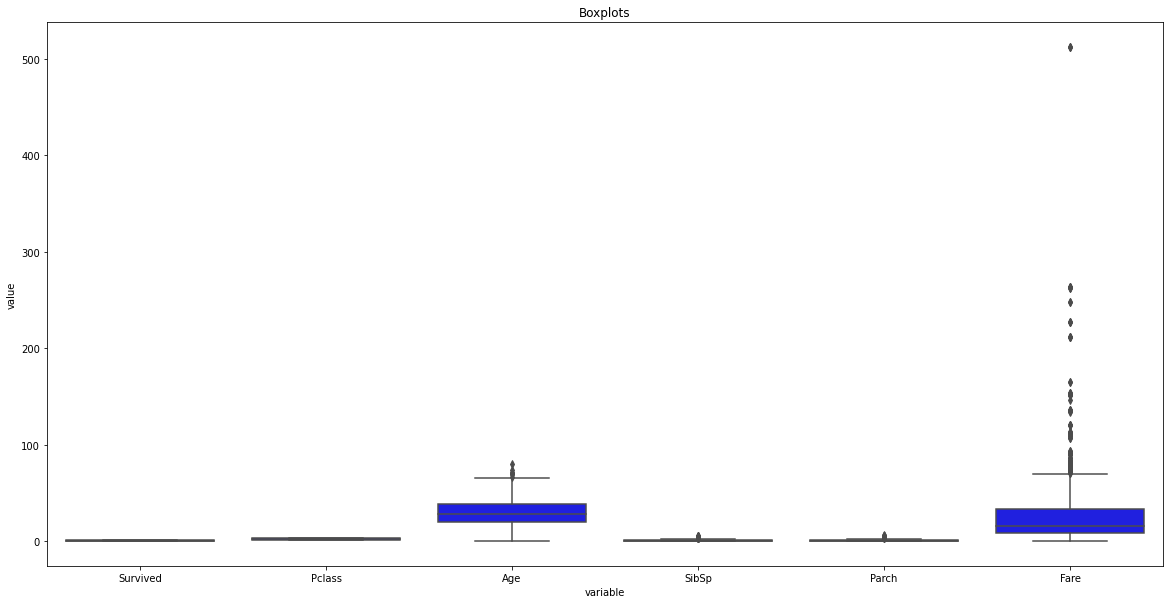

In [ ]:
# Using boxplots to check for outliers

boxplot = pd.DataFrame(data = titanic, columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

plt.figure(figsize=(20,10))

sns.boxplot(x='variable', y='value', data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')

plt.show()

- The age and fare columns have outliers. We will keep these records in the analysis but perform feature scaling later on before modelling.

# Exploratory Data Analysis

## Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SibSp Distribution')

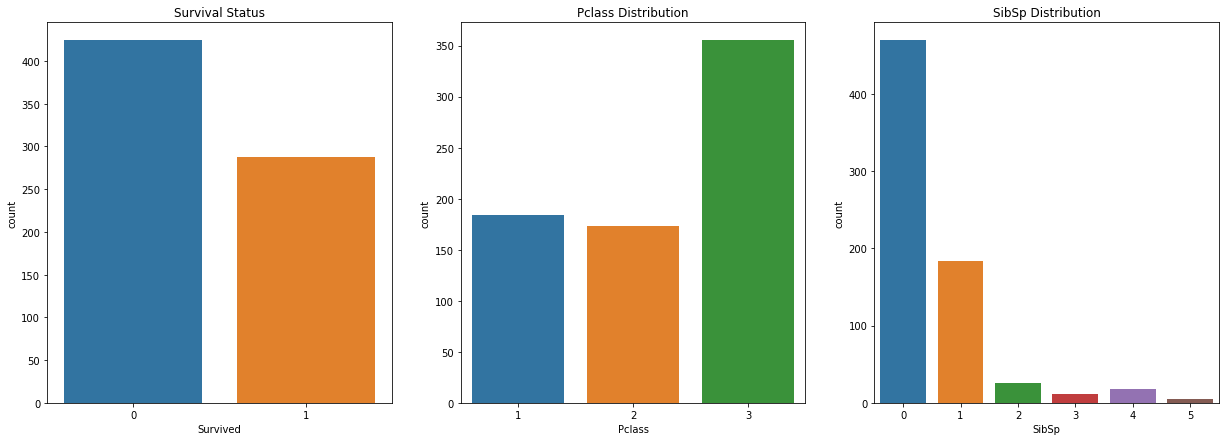

In [ ]:
# plotting bar charts to check distributions

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Survived',data=titanic,ax=ax[0])
ax[0].set_title('Survival Status')
sns.countplot('Pclass',data=titanic,ax=ax[1])
ax[1].set_title('Pclass Distribution')
sns.countplot('SibSp',data=titanic,ax=ax[2])
ax[2].set_title('SibSp Distribution')

- We can see the number of casualties was higher than that of survivors.
- Also, most passengers were in the third Pclass while the most popular SibSp was 0.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked Distribution')

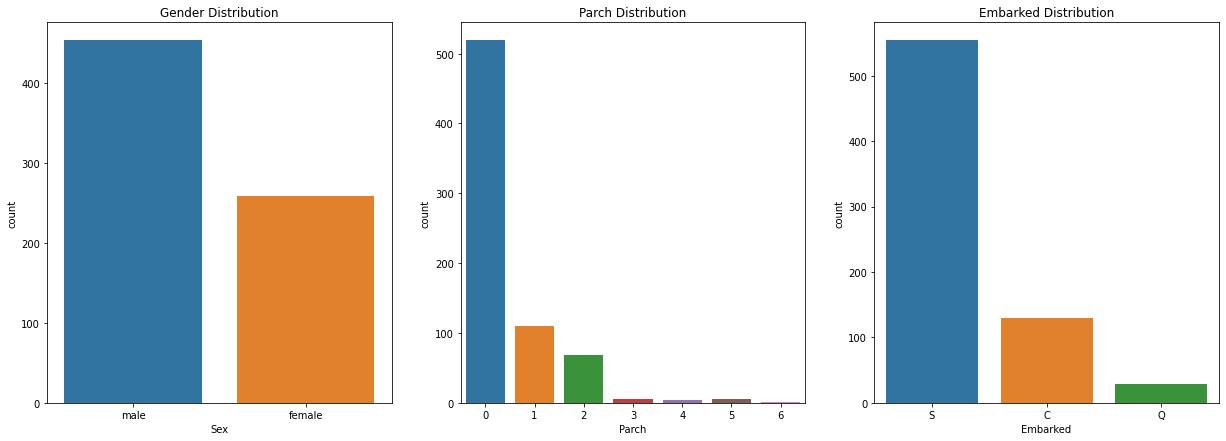

In [ ]:
# more bar charts

fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Sex',data=titanic,ax=ax[0])
ax[0].set_title('Gender Distribution')
sns.countplot('Parch',data=titanic,ax=ax[1])
ax[1].set_title('Parch Distribution')
sns.countplot('Embarked',data=titanic,ax=ax[2])
ax[2].set_title('Embarked Distribution')

- Most passengers on the Titanic were male and most of the embarked from Southampton.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

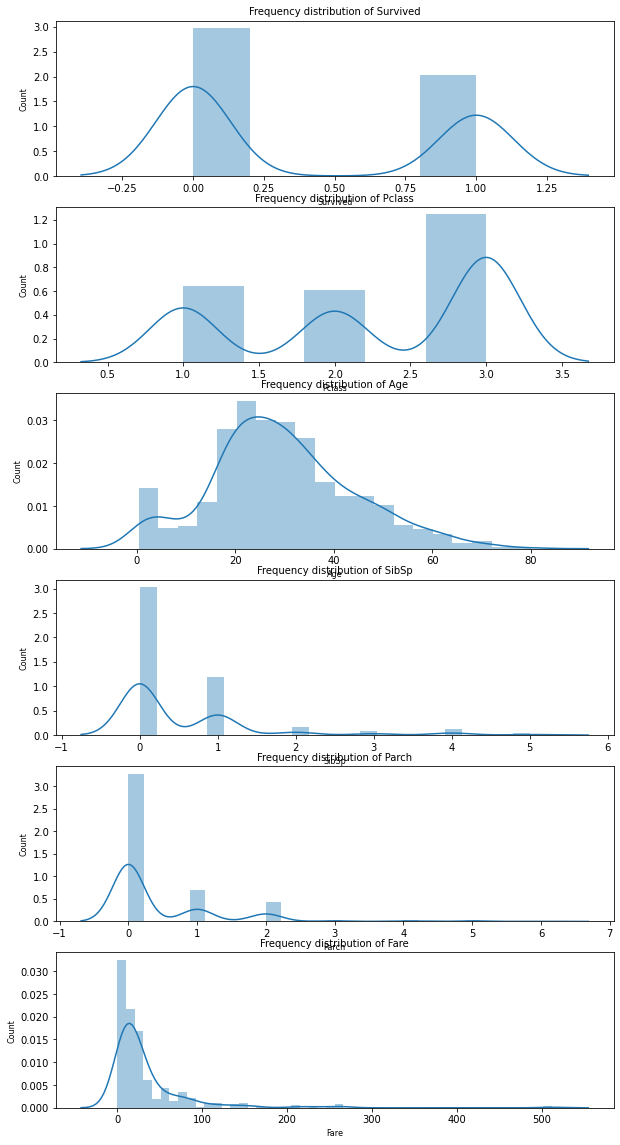

In [ ]:
# Frequency distribution plots

col_names = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(titanic[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

- The fare variable has a right skew, with most passengers paying fares between 0 and 50.
- The age variable has a normal distribution.

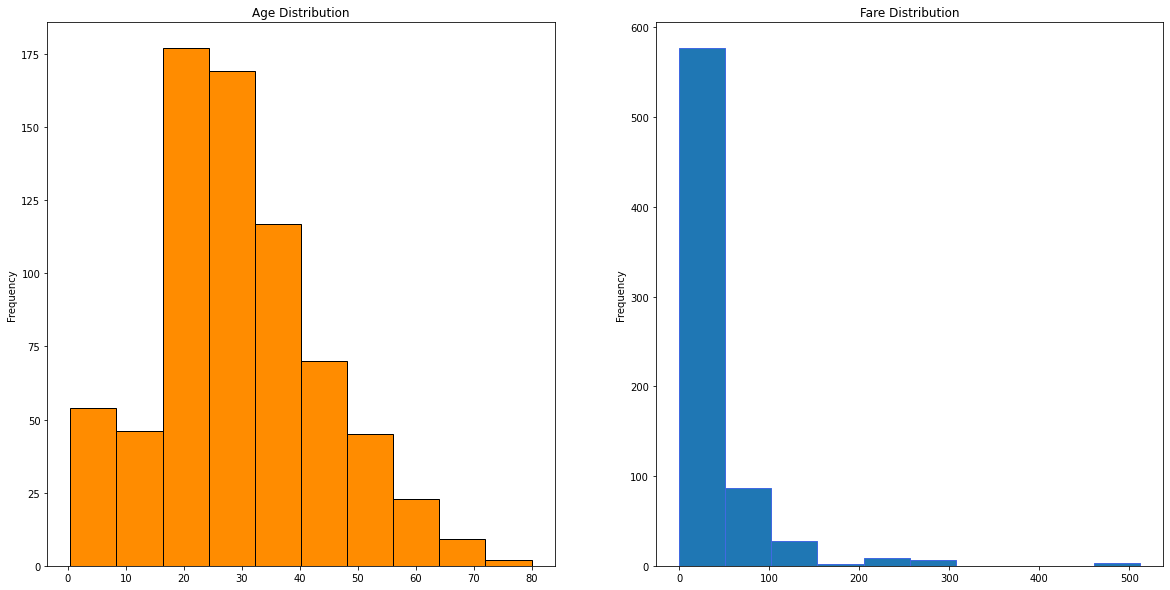

In [ ]:
# histograms to show distribution of age and fare

fig, ax=plt.subplots(1,2, figsize=(20,10))
titanic['Age'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('Age Distribution')

titanic['Fare'].plot.hist(ax=ax[1], bins=10, edgecolor='royalblue')
ax[1].set_title('Fare Distribution')


plt.show()

Measures of Central Tendency

In [ ]:
# mean, mode and median ages

print('Mean age is ' + str(titanic.Age.mean()))
print('Median age is ' + str(titanic.Age.median()))
print('Mode age is ' + str(titanic.Age.mode()))

Mean age is 29.64209269662921
Median age is 28.0
Mode age is 0    24.0
dtype: float64


In [ ]:
# mean, mode and median fares

print('Mean fare is ' + str(titanic.Fare.mean()))
print('Median fare is ' + str(titanic.Fare.median()))
print('Mode fare is ' + str(titanic.Fare.mode()))

Mean fare is 34.56725140449432
Median fare is 15.64585
Mode fare is 0    13.0
dtype: float64


- Checking the remaining means as well measures of dispersion in the summary below

In [ ]:
# summary statistics of numeric variables

titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Bivariate Analysis

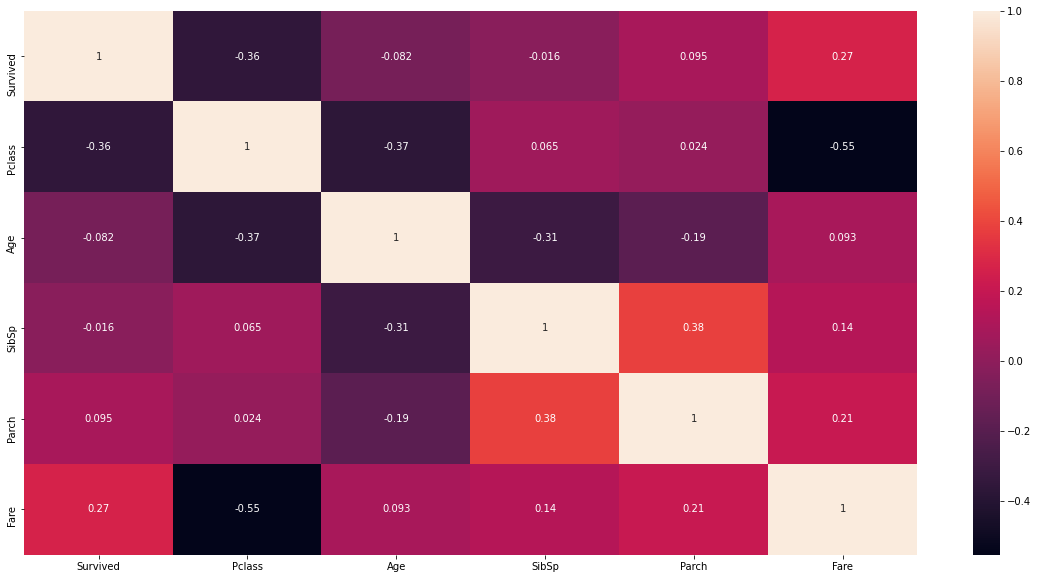

In [ ]:
# Plotting the Pearson correlation coefficients

plt.figure(figsize=(20,10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

- The attributes SibSp and Parch have a relatively weak positive correlation. On the other hand, fare and Pclass have a strong negative correlation, which is expected since space seating cost on a ship varies.

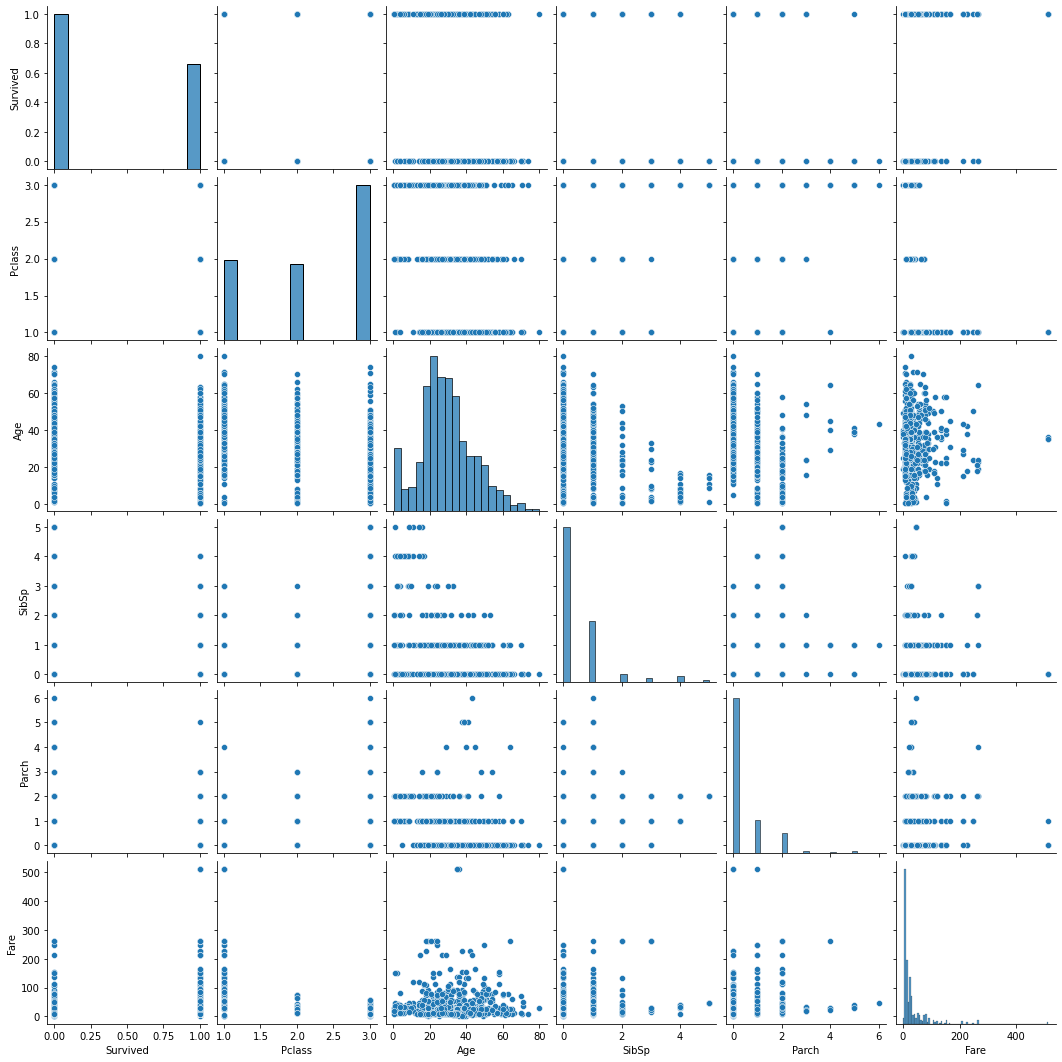

In [ ]:
# Ploting the bivariate summaries

sns.pairplot(titanic)
plt.show()

In [ ]:
# Creating age groups

conditions = [
    (titanic['Age'] >= 0) & (titanic['Age'] <= 10),
    (titanic['Age'] >= 11) & (titanic['Age'] <= 20),
    (titanic['Age'] >= 21) & (titanic['Age'] <= 30),
    (titanic['Age'] >= 31) & (titanic['Age'] <= 40),
    (titanic['Age'] >= 41) & (titanic['Age'] <= 50),
    (titanic['Age'] >= 51) & (titanic['Age'] <= 60),
    (titanic['Age'] >= 61) & (titanic['Age'] <= 100)]

# create a list of the values we want to assign for each condition
values = ['Below 10', '11-20', '21-30', '31-40', '41-50', '51-60', 'Above 60']

# create a new column and use np.select to assign values to it using our lists as arguments
titanic['age_group'] = np.select(conditions, values)

# display updated DataFrame
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,21-30
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,31-40
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,21-30
4,1,1,female,35.0,1,0,113803,53.1000,S,31-40
5,0,3,male,35.0,0,0,373450,8.0500,S,31-40


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


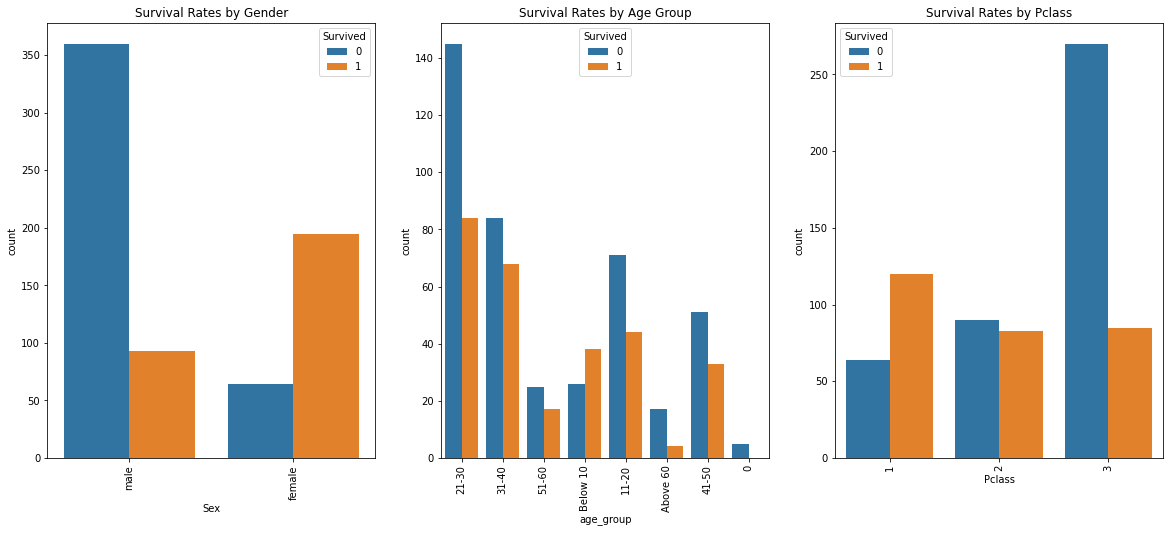

In [ ]:
# Comparing survival rate with gender, age group and Pclass

fig,ax=plt.subplots(1,3,figsize=(20,8))

sns.countplot('Sex',hue='Survived',data=titanic,ax=ax[0])
ax[0].set_title('Survival Rates by Gender')


sns.countplot('age_group',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Survival Rates by Age Group')


sns.countplot('Pclass',hue='Survived',data=titanic,ax=ax[2])
ax[2].set_title('Survival Rates by Pclass')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

- For females, most of them survived unlike the males.
- The number of casualities was highest for those in the age group 21-30.
- Most casualities were also in Pclass 3.

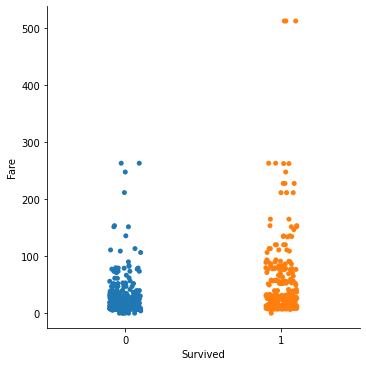

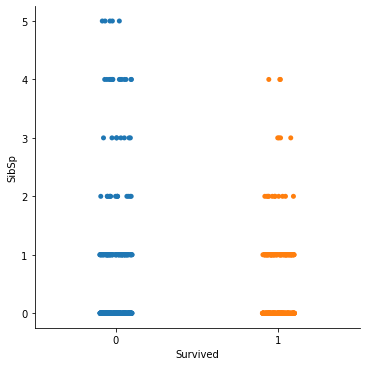

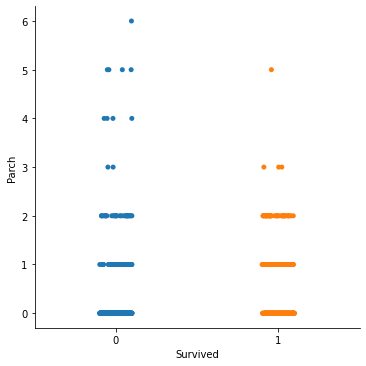

In [ ]:
# comparing survival odds to other numeric attributes

#sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Survived", y="Fare", data=titanic)
sns.catplot(x="Survived", y="SibSp", data=titanic)
sns.catplot(x="Survived", y="Parch", data=titanic)


# Implementing the Solution

## Feature Engineering

In [ ]:
# Dropping unnecessary columns

titanic = titanic.drop(columns=['age_group'])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,382652,29.1250,Q
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S


In [ ]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Ticket'] = le.fit_transform(titanic['Ticket'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,407,7.2500,2
2,1,1,0,38.0,1,0,470,71.2833,0
3,1,3,0,26.0,0,0,531,7.9250,2
4,1,1,0,35.0,1,0,39,53.1000,2
5,0,3,1,35.0,0,0,372,8.0500,2


## KNN Classifier

### 80 - 20 Split of the data

In [ ]:
# Defining the features and target variable

my_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

# features
X = titanic[my_cols].values

# target variable
y = titanic['Survived'].values

In [ ]:
# Defining the training and tests sets with an 80 - 20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the model

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Making predictions

y_pred1 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
48        0          0
87        0          0
101       1          1
71        1          1
116       1          0
           Actual   Predicted
count  143.000000  143.000000
mean     0.426573    0.377622
std      0.496318    0.486496
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [ ]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[72 10]
 [17 44]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        82
           1       0.81      0.72      0.77        61

    accuracy                           0.81       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



- The model has an accuracy score of 81%. The correct number of predictions are 72 true positives and 44 false negatives while the number of incorrect predictions are 10 false positives and 17 false negatives.

### 70 - 30 Split of the data

In [ ]:
# Defining the training and tests sets with 70-30 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the model

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Making predictions

y_pred2 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
5         0          0
176       1          1
97        1          1
212       1          1
18        1          0
           Actual   Predicted
count  214.000000  214.000000
mean     0.415888    0.397196
std      0.494030    0.490465
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [ ]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[101  24]
 [ 28  61]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       125
           1       0.72      0.69      0.70        89

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214



- With a 70-30 split of the data, the model has an accuracy score of 76%. The correct number of predictions are 101 true positives and 61 false negatives while the number of incorrect predictions are 24 false positives and 28 false negatives.

### 60 - 40 Split of the data

In [ ]:
# Defining the training and tests sets with 60-40 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the model

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Making predictions

y_pred3 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
82        1          0
249       0          0
205       0          0
100       0          0
162       1          1
           Actual   Predicted
count  285.000000  285.000000
mean     0.407018    0.407018
std      0.492142    0.492142
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [ ]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[140  29]
 [ 29  87]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       169
           1       0.75      0.75      0.75       116

    accuracy                           0.80       285
   macro avg       0.79      0.79      0.79       285
weighted avg       0.80      0.80      0.80       285



- For a 60-40 training and test sets split, the model has an accuracy score of 80%. The correct number of predictions are 140 true positives and 87 false negatives while the number of incorrect predictions are 29 false positives and 29 false negatives.

- The model with 80 - 20 split of the dataset performs best with an f1- score accuracy of 81%.

## Model Optimization

### LDA

Performing dimensionality reduction with Linear Discriminant Analysis (LDA)

In [ ]:
# Defining the training and tests sets with an 80 - 20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Peforming LDA

lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
# Training and Making Predictions

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
9         0          1
125       0          0
67        1          0
63        1          0
139       0          0
           Actual   Predicted
count  143.000000  143.000000
mean     0.426573    0.328671
std      0.496318    0.471381
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [ ]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[75  7]
 [21 40]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.85      0.66      0.74        61

    accuracy                           0.80       143
   macro avg       0.82      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143

Accuracy: 0.8041958041958042


- With only two features identified by LDA, the model accuracy does not improve much, it actually goes down.

In [ ]:
# Using 4 components of LDA

lda = LDA(n_components=4)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training and Making Predictions

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[75  7]
 [21 40]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.85      0.66      0.74        61

    accuracy                           0.80       143
   macro avg       0.82      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143

Accuracy: 0.8041958041958042


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


- Even with four most important features identified through LDA, the model's performance does not improve at all.

### Cosine Similarity

Using cosine similarity as a distance metric to optimize the model

In [ ]:
# Defining cosine similarity function

def cos_knn(k, X_test, y_test, X_train, y_train):
    
    # find similarity for every point in test data between every other point in the train data
    cosim = cosine_similarity(X_test, X_train)

    # get indices of records in the train data that are most similar to any given test data point
    top = [(heapq.nlargest((k+1), range(len(i)), i.take)) for i in cosim]

    # convert indices to numbers
    top = [[y_train[j] for j in i[:k]] for i in top]

     # vote, and return prediction for every record in test data
    pred = [max(set(i), key=i.count) for i in top]
    pred = np.array(pred)
    
    # print table giving classifier accuracy using target variable in the test data
    print(classification_report(y_test, pred))   
    

In [ ]:
# Checking model accuracy for a 80-20 dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the model accuracy
cos_knn(5, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        82
           1       0.78      0.69      0.73        61

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



In [ ]:
# Checking model accuracy for a 70-30 dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the model accuracy
cos_knn(5, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       125
           1       0.69      0.67      0.68        89

    accuracy                           0.74       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.74      0.74       214



In [ ]:
# Checking model accuracy for a 60-40 dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the model accuracy
cos_knn(5, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       169
           1       0.71      0.72      0.72       116

    accuracy                           0.77       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.77      0.77      0.77       285



- The cosine similarity distance metric has not improved the baseline model any further.

# Challenging the Solution

•	Given the current dataset size, a KNN classifier with a K value of 5 and a training-test split of 80-20 provides a relatively high accuracy classification. LDA and cosine similarity distance metric does not improve the model's accuracy.

•	For further optimization, other distance metrics such as Euclidean and Minkowski distance metrics can be explored. Also, different values of K can be used to check for optimal model performance.



# Follow-up Questions

## a) Did we have the right question?

Yes, the research question was specific and clear.

## b) Did we have the right data?

Yes, the data available contained relevant information to train the classification model.

## c) Do we need other data to answer the research question?

Some of the records were left out of this analysis since they did not have the target variable. This issue could be resolved to allow for more data to be included in the classification model.